# **Regresión Lineal Dataset Titanic.**

## **UNAD** 
## **Tarea 5** - **Proyecto Análisis de datos.**
## **Manuel Ricardo Hernández.**
## **Grupo Colaborativo 202016908A_1704.** 

## Pasos de la Actividad:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9.  Crear una cuenta en GitHub y cargar los códigos de los modelos
diseñados https://github.com/

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [4]:
#Cargue de librerias.  

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
Datos_Titanic = pd.read_csv('C:/Users/sopor/OneDrive - Universidad Nacional Abierta y a Distancia/ANALISIS DE DATOS/Entrega 5/Dataset/Titanic.csv')

In [6]:
# Datos en Python para el EDA. 
Datos_Titanic.head(892)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Identificación de los Datos Faltantes y Atipicos Para Datos_Titanic.')

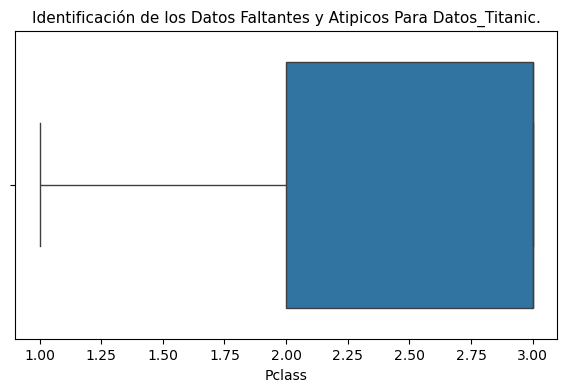

In [10]:
#Datos Faltantes y Atipicos Datos Enfermedades Cardiacas. 
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos_Titanic['Pclass'])
plt.title('Identificación de los Datos Faltantes y Atipicos Para Datos_Titanic.', fontsize=11)

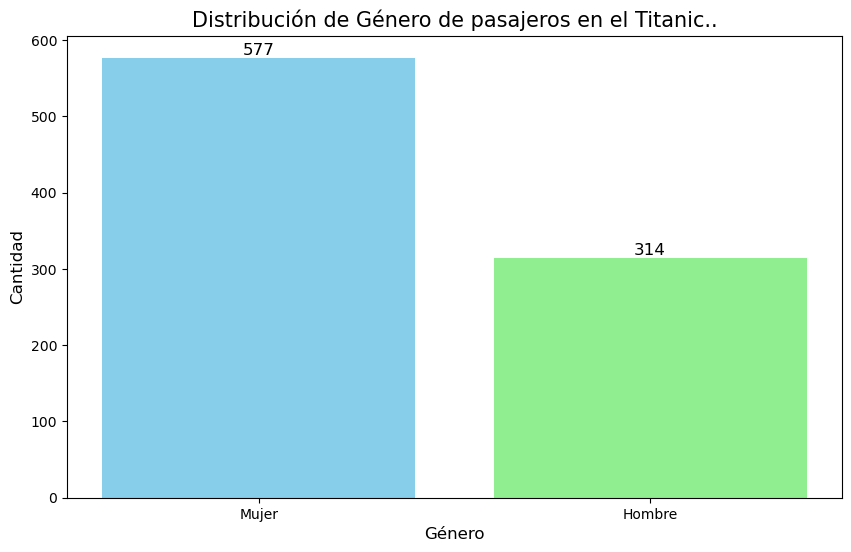

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
Datos_Titanic = pd.read_csv('C:/Users/sopor/OneDrive - Universidad Nacional Abierta y a Distancia/ANALISIS DE DATOS/Entrega 5/Dataset/Titanic.csv')

# Contar los valores en la columna 'sex'
genero = Datos_Titanic['Sex'].value_counts()

# Configuración y creación del gráfico
plt.figure(figsize=(10, 6))
plt.bar(genero.index, genero.values, color=['skyblue', 'lightgreen'])

plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Género de pasajeros en el Titanic..', fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Mujer", "Hombre"])

for i, valor in enumerate(genero.values):
    plt.annotate(str(valor), xy=(genero.index[i], valor), ha='center', va='bottom', fontsize=12)
    
# Mostrar el gráfico
plt.show()


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [28]:
#Revision de datos faltantes.  

print("Numero de Registros con cero en la columna PassengerId (ID de Pasajero): ", Datos_Titanic['PassengerId'].isin([0]).sum())
print("Numero de Registros con cero en la columna Survived (Sobreviviente):", Datos_Titanic['Survived'].isin([0]).sum())
print("Numero de Registros con cero en la columna Pclass (Clase del pasajero):", Datos_Titanic['Pclass'].isin([0]).sum())
print("Numero de Registros con cero en la columna Name (Nombre):", Datos_Titanic['Name'].isin([0]).sum())
print("Numero de Registros con cero en la columna Sex (Genero):", Datos_Titanic['Sex'].isin([0]).sum())
print("Numero de Registros con cero en la columna Age (Edad): ", Datos_Titanic['Age'].isin([0]).sum())
print("Numero de Registros con cero en la columna SibSp (Parentezco):", Datos_Titanic['SibSp'].isin([0]).sum())
print("Numero de Registros con cero en la columna Parch (Padres abordo): ", Datos_Titanic['Parch'].isin([0]).sum())
print("Numero de Registros con cero en la columna Ticket (Numero de Ticket):", Datos_Titanic['Ticket'].isin([0]).sum())
print("Numero de Registros con cero en la columna Fare (Tarifa):", Datos_Titanic['Fare'].isin([0]).sum())
print("Numero de Registros con cero en la columna Cabin (Numero de Cabina):", Datos_Titanic['Cabin'].isin([0]).sum())
print("Numero de Registros con cero en la columna Embarked (Si embarco o no al Titanic):", Datos_Titanic['Embarked'].isin([0]).sum())

Numero de Registros con cero en la columna PassengerId (ID de Pasajero):  0
Numero de Registros con cero en la columna Survived (Sobreviviente): 549
Numero de Registros con cero en la columna Pclass (Clase del pasajero): 0
Numero de Registros con cero en la columna Name (Nombre): 0
Numero de Registros con cero en la columna Sex (Genero): 0
Numero de Registros con cero en la columna Age (Edad):  0
Numero de Registros con cero en la columna SibSp (Parentezco): 608
Numero de Registros con cero en la columna Parch (Padres abordo):  678
Numero de Registros con cero en la columna Ticket (Numero de Ticket): 0
Numero de Registros con cero en la columna Fare (Tarifa): 15
Numero de Registros con cero en la columna Cabin (Numero de Cabina): 0
Numero de Registros con cero en la columna Embarked (Si embarco o no al Titanic): 0


In [30]:
#Proceder a imputar todos los datos en ceros con el valor medio de la columna. 

Datos_Titanic['Survived']=Datos_Titanic['Survived'].replace(0,Datos_Titanic['Survived'].mean())
Datos_Titanic['SibSp']=Datos_Titanic['SibSp'].replace(0,Datos_Titanic['SibSp'].mean())
Datos_Titanic['Parch']=Datos_Titanic['Parch'].replace(0,Datos_Titanic['Parch'].mean())
Datos_Titanic['Fare']=Datos_Titanic['Fare'].replace(0,Datos_Titanic['Fare'].mean())

In [32]:
#Nueva revision de datos faltantes. 
print("Numero de Registros con cero en la columna PassengerId (ID de Pasajero): ", Datos_Titanic['PassengerId'].isin([0]).sum())
print("Numero de Registros con cero en la columna Survived (Sobreviviente):", Datos_Titanic['Survived'].isin([0]).sum())
print("Numero de Registros con cero en la columna Pclass (Clase del pasajero):", Datos_Titanic['Pclass'].isin([0]).sum())
print("Numero de Registros con cero en la columna Name (Nombre):", Datos_Titanic['Name'].isin([0]).sum())
print("Numero de Registros con cero en la columna Sex (Genero):", Datos_Titanic['Sex'].isin([0]).sum())
print("Numero de Registros con cero en la columna Age (Edad): ", Datos_Titanic['Age'].isin([0]).sum())
print("Numero de Registros con cero en la columna SibSp (Parentezco):", Datos_Titanic['SibSp'].isin([0]).sum())
print("Numero de Registros con cero en la columna Parch (Padres abordo): ", Datos_Titanic['Parch'].isin([0]).sum())
print("Numero de Registros con cero en la columna Ticket (Numero de Ticket):", Datos_Titanic['Ticket'].isin([0]).sum())
print("Numero de Registros con cero en la columna Fare (Tarifa):", Datos_Titanic['Fare'].isin([0]).sum())
print("Numero de Registros con cero en la columna Cabin (Numero de Cabina):", Datos_Titanic['Cabin'].isin([0]).sum())
print("Numero de Registros con cero en la columna Embarked (Si embarco o no al Titanic):", Datos_Titanic['Embarked'].isin([0]).sum())

Numero de Registros con cero en la columna PassengerId (ID de Pasajero):  0
Numero de Registros con cero en la columna Survived (Sobreviviente): 0
Numero de Registros con cero en la columna Pclass (Clase del pasajero): 0
Numero de Registros con cero en la columna Name (Nombre): 0
Numero de Registros con cero en la columna Sex (Genero): 0
Numero de Registros con cero en la columna Age (Edad):  0
Numero de Registros con cero en la columna SibSp (Parentezco): 0
Numero de Registros con cero en la columna Parch (Padres abordo):  0
Numero de Registros con cero en la columna Ticket (Numero de Ticket): 0
Numero de Registros con cero en la columna Fare (Tarifa): 0
Numero de Registros con cero en la columna Cabin (Numero de Cabina): 0
Numero de Registros con cero en la columna Embarked (Si embarco o no al Titanic): 0


Text(0.5, 1.0, 'Identificación de Datos Atipicos "Dataset Titanic".')

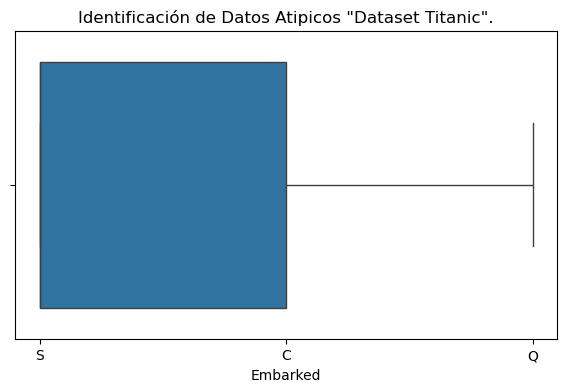

In [36]:
#Datos Atipicos.  
plt.figure(figsize=(7,4))
sns.boxplot(x=Datos_Titanic['Embarked'])
plt.title('Identificación de Datos Atipicos "Dataset Titanic".',fontsize=12)

In [44]:
#Contador de Datos Atipicos.  
nivel_minimo=0
nivel_maximo=1
Total_Atipico=((Datos_Titanic['SibSp']<nivel_minimo)|(Datos_Titanic['SibSp']>nivel_maximo)).sum()
print("Los datos atipicos de la columna Survived es de {}.".format(Total_Atipico))

Los datos atipicos de la columna Survived es de 54.


In [48]:
#Filtrar
Datos_Titanic=Datos_Titanic[(Datos_Titanic['SibSp']<nivel_maximo)&(Datos_Titanic['SibSp']>nivel_minimo)]

In [50]:
#Validar si los datos fueron removidos.  
Total_Atipico=((Datos_Titanic['SibSp']<nivel_minimo)|(Datos_Titanic['SibSp']>nivel_maximo)).sum()
print("El Total de Datos Atipicos es {}.".format(Total_Atipico))

El Total de Datos Atipicos es 0.


In [52]:
#Revision de Tipo de datos y datos faltantes.  
Datos_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 4 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  398 non-null    int64  
 1   Survived     398 non-null    float64
 2   Pclass       398 non-null    int64  
 3   Name         398 non-null    object 
 4   Sex          398 non-null    object 
 5   Age          296 non-null    float64
 6   SibSp        398 non-null    float64
 7   Parch        398 non-null    float64
 8   Ticket       398 non-null    object 
 9   Fare         398 non-null    float64
 10  Cabin        49 non-null     object 
 11  Embarked     398 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 40.4+ KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristicas de Interes.
* Titanic: Si hubo sobrevivientes o no hubo. (0 es no sobrevivio y 1 si sobrevivio).
* Vamos a predecir si una persona sobrevivieron.  

**Personas Sobrevivientes.**  

In [58]:
Datos_Titanic['Survived'].value_counts()

Survived
0.383838    398
Name: count, dtype: int64

In [248]:
Datos_Enfermedades_Cardiacas[['condition']].head(20)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.  

In [60]:
# Train (75%) - Test (25%).  
X = Datos_Titanic.drop('Survived',axis=1)
Y = Datos_Titanic['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y,random_state=0)

In [62]:
print(X_train)

     PassengerId  Pclass                               Name     Sex   Age  \
149          150       2  Byles, Rev. Thomas Roussel Davids    male  42.0   
734          735       2       Troupiansky, Mr. Moses Aaron    male  23.0   
154          155       3              Olsen, Mr. Ole Martin    male   NaN   
658          659       2       Eitemiller, Mr. George Floyd    male  23.0   
696          697       3                   Kelly, Mr. James    male  44.0   
..           ...     ...                                ...     ...   ...   
589          590       3                Murdlin, Mr. Joseph    male   NaN   
64            65       1              Stewart, Mr. Albert A    male   NaN   
882          883       3       Dahlberg, Miss. Gerda Ulrika  female  22.0   
150          151       2         Bateman, Rev. Robert James    male  51.0   
738          739       3                 Ivanoff, Mr. Kanio    male   NaN   

        SibSp     Parch       Ticket     Fare Cabin Embarked  
149  0.52300

In [64]:
print(Y_train)

149    0.383838
734    0.383838
154    0.383838
658    0.383838
696    0.383838
         ...   
589    0.383838
64     0.383838
882    0.383838
150    0.383838
738    0.383838
Name: Survived, Length: 298, dtype: float64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [117]:
#Construcción del modelo de Regresión Lineal.
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit (X_train , Y_train)

#Creación de modelo de predicción.  
Prediccion_clases = [1 if prob >= 0.5 else 0 for prob in Prediccion]
Prediccion = modelo_regresion_lineal.predict(X_test)

In [119]:
print(Y_test)

[147 147 147 147 147 147 147 147 147 107  55 147 147 147 147  99  95 147
 147  52 147 147 147 147 147 147 147 147 147 147 147 147 147 147 147 147
  13 147 147 147 147 147 147 147 147 147 147 147 147 108 147  37 147  47
 147 135 147  36 147 147 147 147 147 147 147 136 147 147 147  96 147  35
  60 130 147 147 147  27 147 147 147 142 124 147  14 147 103 125 147 147
 147 147 110 147 147 147  58 147  90 147 147 147  31 147 147 147 147 133
 147   8  58 147  86 121  88 147  12  90 147 147 147  93 113 147 147 147
  94  45 147 147 147 147 147 147   4 147 147 147 147 147 147 147 147 147
 147 147 147 147  41 147 147 147 147 147 147 147 147 147 147 147 147 147
 147 147 147  23 147  97 147 147  91 147 121 147 147 147 147 147 145]


In [121]:
print(Prediccion_clases)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como presición, recall, F1-score, etc.  

## 7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.  

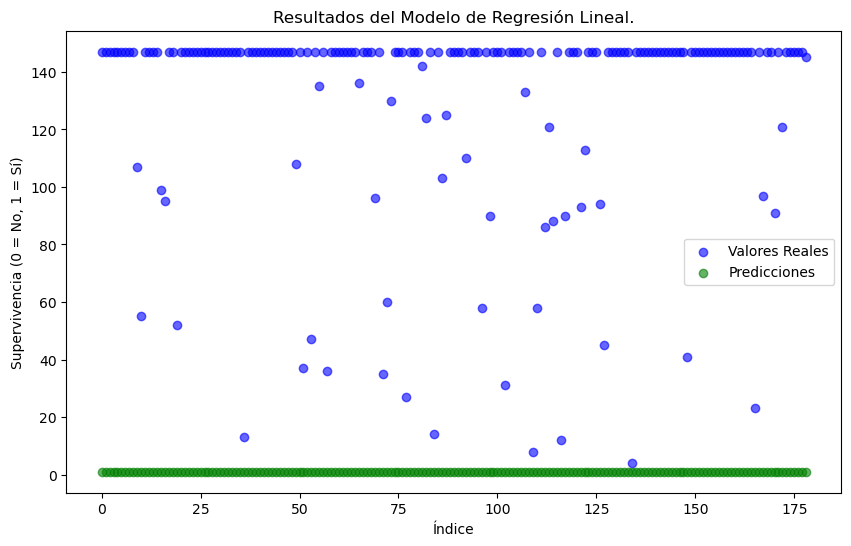

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Valores Reales', alpha=0.6)
plt.scatter(range(len(Prediccion_clases)), Prediccion_clases, color='green', label='Predicciones', alpha=0.6)
plt.title("Resultados del Modelo de Regresión Lineal.")
plt.xlabel("Índice")
plt.ylabel("Supervivencia (0 = No, 1 = Sí)")
plt.legend()
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos. 

## En cuanto al desempeño del modelo se puedes afirmar lo siguiente:  
* La regresión lineal no es el algoritmo más adecuado para problemas de clasificación binaria, como la supervivencia (0 o 1). En estos casos, se recomienda usar modelos como la regresión logística o métodos de aprendizaje supervisado más avanzados (árboles de decisión, SVM, redes neuronales, etc.).
* Este modelo parece haber tenido dificultades para separar las dos clases, ya que predijo casi exclusivamente un solo valor (0).
* La alineación de las predicciones en una sola clase podría indicar un desbalance en los datos de entrenamiento. Por ejemplo, si la mayoría de las muestras pertenecen a la clase "No sobrevivió", el modelo puede haber aprendido a predecir solo esa clase.
* La discrepancia evidente entre los valores reales y las predicciones sugiere que el modelo tiene un desempeño deficiente. Métricas como precisión, recall o F1-score deberían calcularse para confirmar esta observación.

**Conclusión y recomendaciones:** El modelo de regresión lineal no es adecuado para este tipo de problema. Se recomienda implementar algoritmos diseñados para clasificación, realizar un análisis exploratorio de los datos y validar el modelo utilizando métricas específicas. 
